In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [8]:
file_a2c = "../Grad Ilustrations/A2C/new env/A2C"
file_ppo = "../Grad Ilustrations/PPO/updated env/PPO.txt"


def preprocess(file):
    lines = []
    with open(file, "r") as f:
        lines = f.readlines()
        lines = list(filter(lambda x:x.startswith("EPISODE"), lines))
        lines = list(map(lambda x:float(x.split()[-1]), lines))
    return lines
    

In [16]:
res_a2c = preprocess(file_a2c)
res_ppo = preprocess(file_ppo)

In [64]:
def plot_smoothed(t, color_smoothed='b', color_var="lightblue",rolling_factor=50, replace_min=-75, title="", xlabel="States"):
    plt.figure(figsize = (20, 6), dpi = 80)
    npt = np.array(t)
    min_npt = min(npt)
    if min_npt < -200:
        npt[npt==min_npt] = replace_min
    df = pd.DataFrame(npt)
    plt.plot(df[0], color_var, df[0].rolling(rolling_factor).mean(), color_smoothed)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel("Reward")
    plt.savefig(title+'.png')

In [65]:
print(res_a2c[0])
print(res_a2c[-1])
print(len(res_a2c))

la2c = len(res_a2c)//3

3.4401784764439114
4.208271621643782
60000


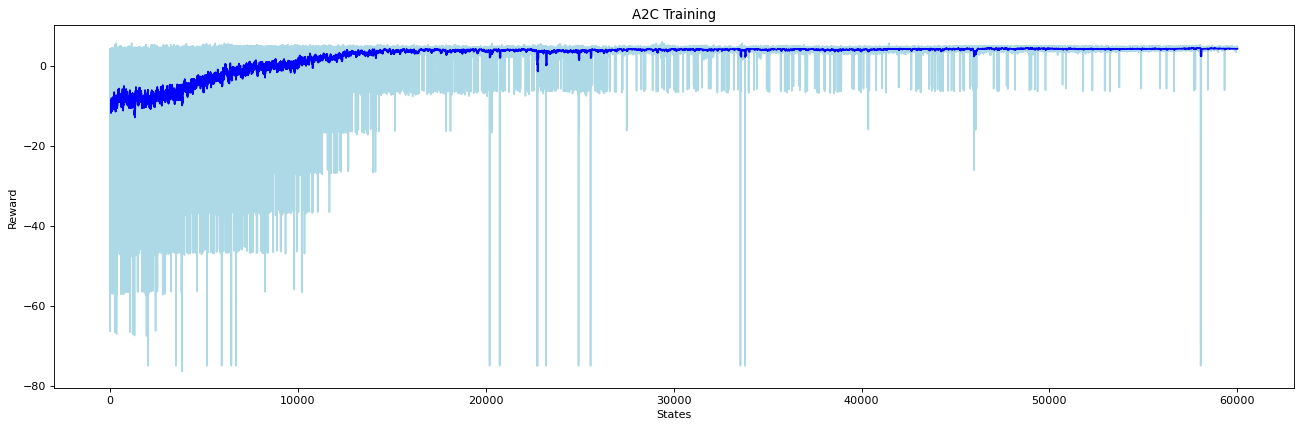

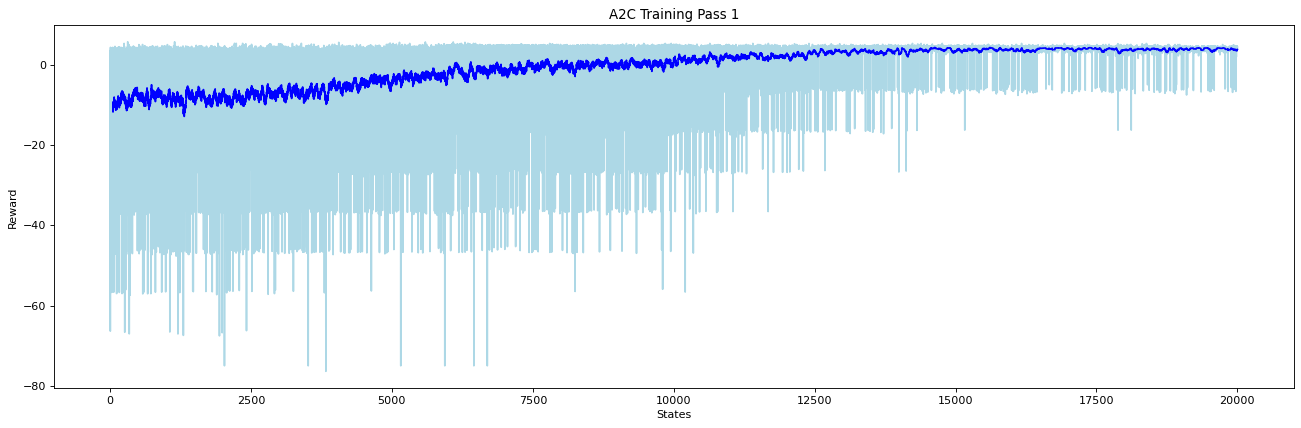

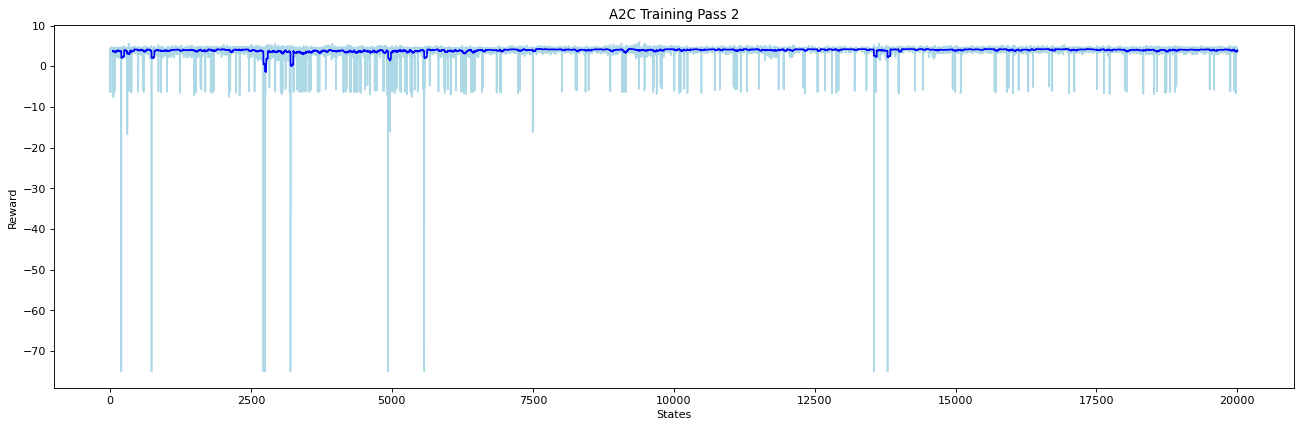

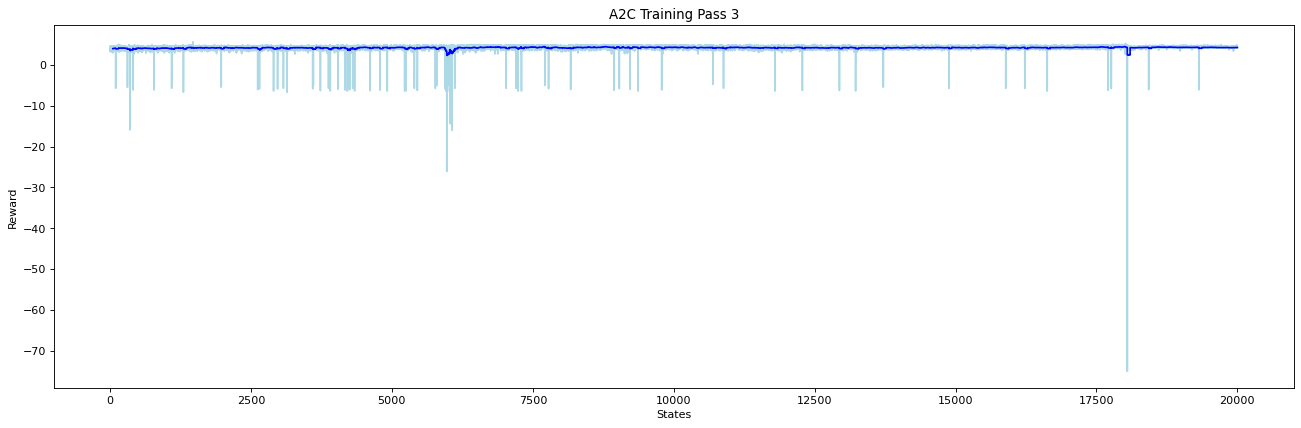

In [66]:
plot_smoothed(res_a2c, title="A2C Training")
plot_smoothed(res_a2c[:la2c], title="A2C Training Pass 1")
plot_smoothed(res_a2c[la2c:2*la2c], title="A2C Training Pass 2")
plot_smoothed(res_a2c[2*la2c:], title="A2C Training Pass 3")

In [67]:
print(res_ppo[0])
print(res_ppo[-1])
print(len(res_ppo))

lppo = len(res_ppo)//3

3.4401784764439114
5.3532561818029585
60672


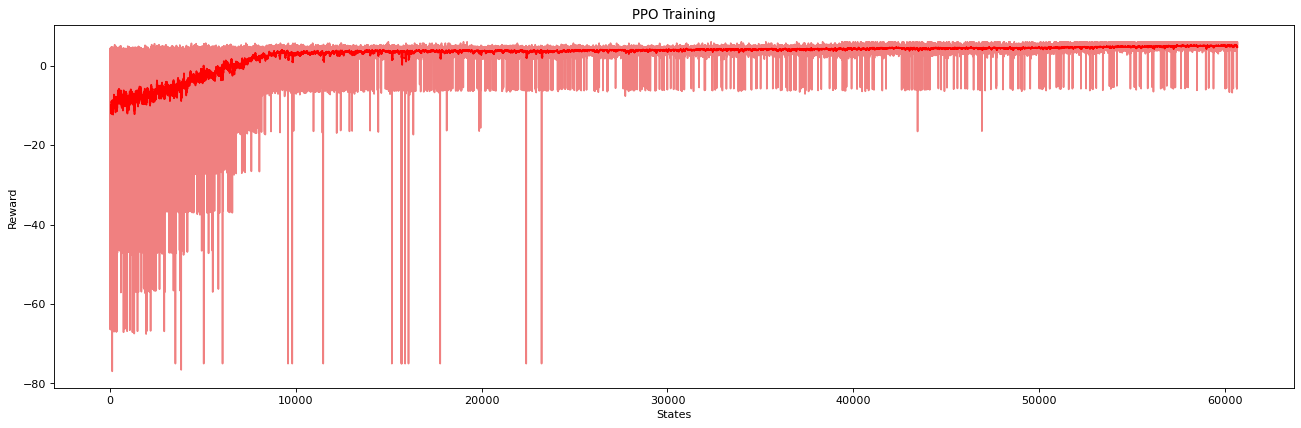

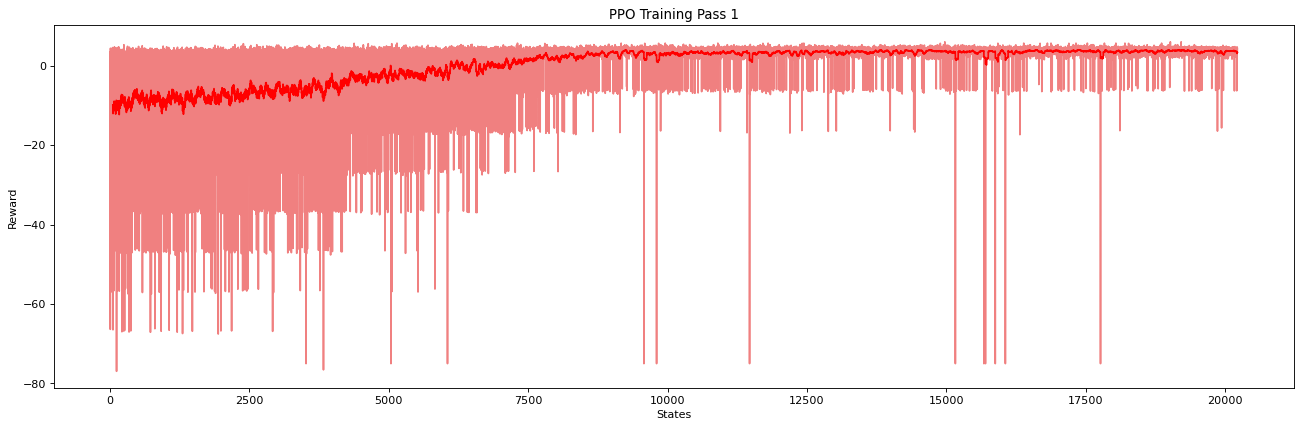

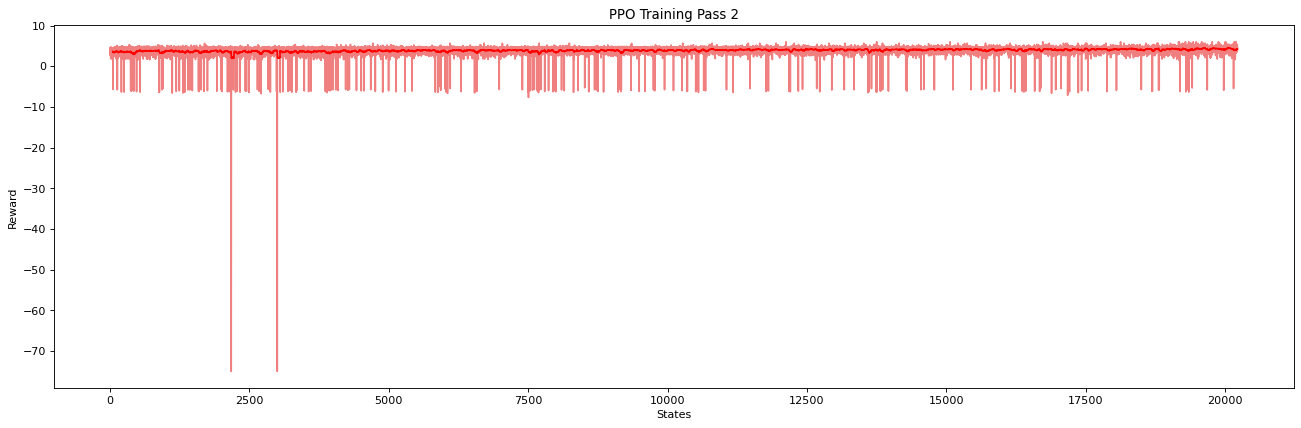

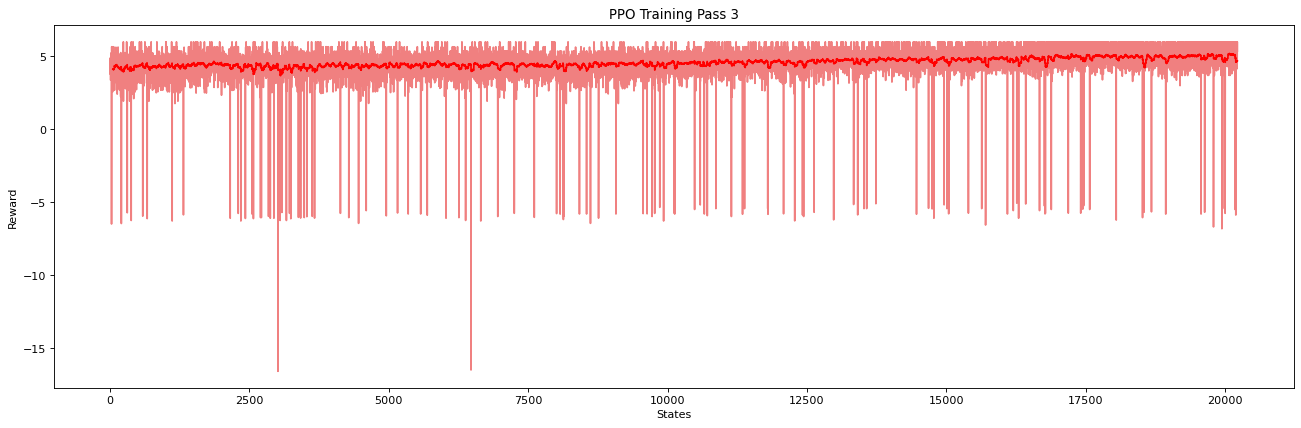

In [68]:
plot_smoothed(res_ppo, color_smoothed='r', color_var="lightcoral", title="PPO Training")
plot_smoothed(res_ppo[:lppo], color_smoothed='r', color_var="lightcoral", title="PPO Training Pass 1")
plot_smoothed(res_ppo[lppo:2*lppo], color_smoothed='r', color_var="lightcoral", title="PPO Training Pass 2")
plot_smoothed(res_ppo[2*lppo:], color_smoothed='r', color_var="lightcoral", title="PPO Training Pass 3")

In [115]:
def final_result(times, rewards, title, ymin=3, ymax=6):
    plt.figure(figsize = (20, 6), dpi = 80)
    plt.bar(times ,rewards)
    plt.ylim(ymin, ymax)
    plt.yticks(np.arange(ymin, ymax+0.2, 0.2))
    plt.title(title)
    plt.xlabel("Time")
    plt.ylabel("Reward")
    plt.savefig(title+".png")

In [126]:
a2c_final = "../Grad Ilustrations/A2C/new env/final_result"
ppo_final = "../Grad Ilustrations/PPO/updated env/final results"
baseline = "../Grad Ilustrations/Baseline/final_result.txt"

times = ["00:00-01:30","01:30-03:00","03:00-04:30","04:30-06:00","06:00-07:30","07:30-09:00","09:00-10:30","10:30-12:00"
        ,"12:00-13:30","13:30-15:00","15:00-16:30","16:30-18:00","18:00-19:30","19:30-21:00","21:00-22:30","22:30-24:00"]

In [117]:
a2c_res = preprocess(a2c_final)

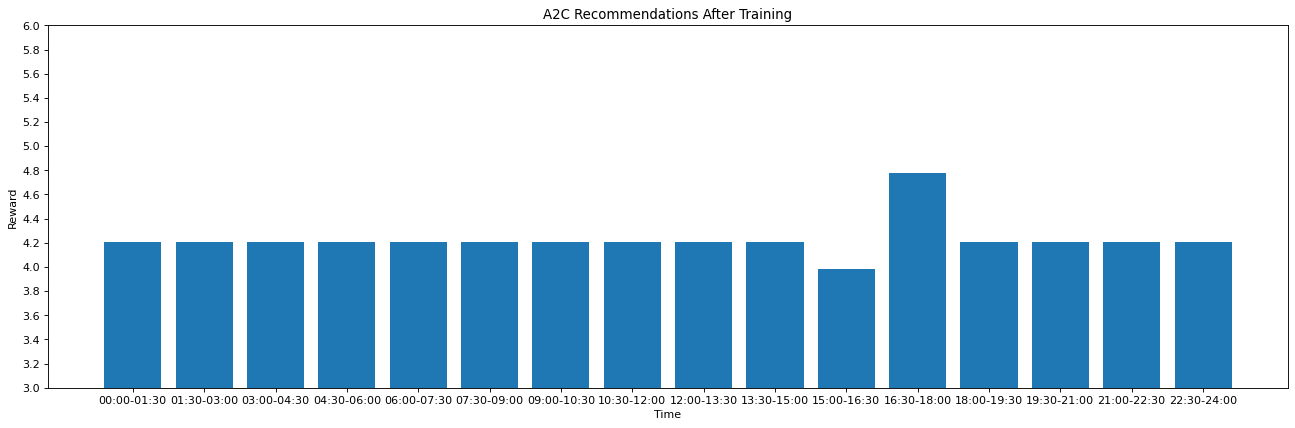

In [128]:
final_result(times, a2c_res, "A2C Recommendations After Training", 3, 6)

In [119]:
ppo_res = preprocess(ppo_final)

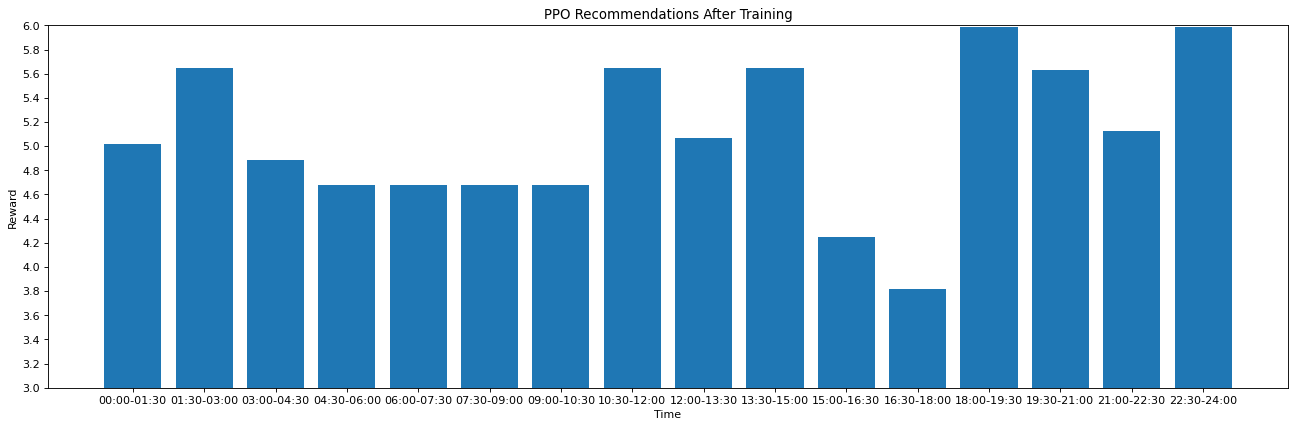

In [123]:
final_result(times, ppo_res, "PPO Recommendations After Training", 3, 6)


In [127]:
baseline_res = preprocess(baseline)

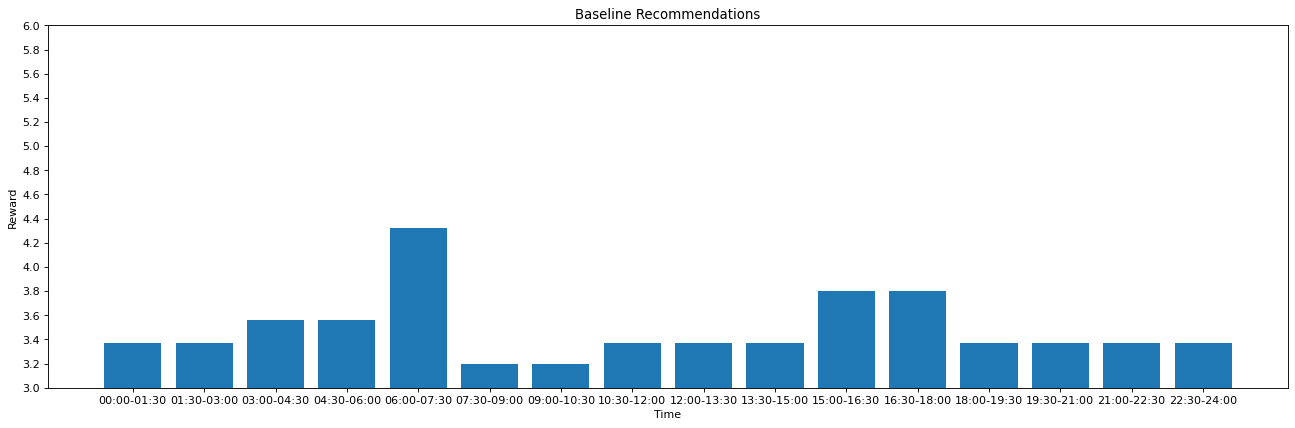

In [129]:
final_result(times, baseline_res, "Baseline Recommendations", 3, 6)

In [134]:
def best_res_during_train(res):
    best = []
    current = 0
    for i in range(16):
        current = 0
        for j in range(i, len(res), 16):
            current = max(current, res[j])
        best.append(current)
    return best


In [135]:
ppo_best = best_res_during_train(res_ppo)
a2c_best = best_res_during_train(res_a2c)

In [136]:
ppo_best[0]

5.986122451530818

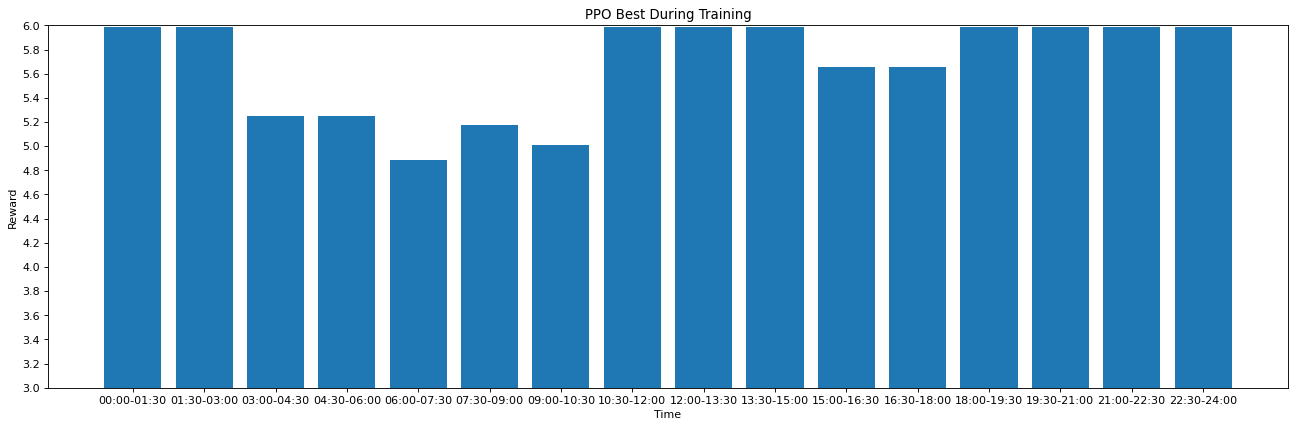

In [137]:
final_result(times, ppo_best, "PPO Best During Training", 3, 6)

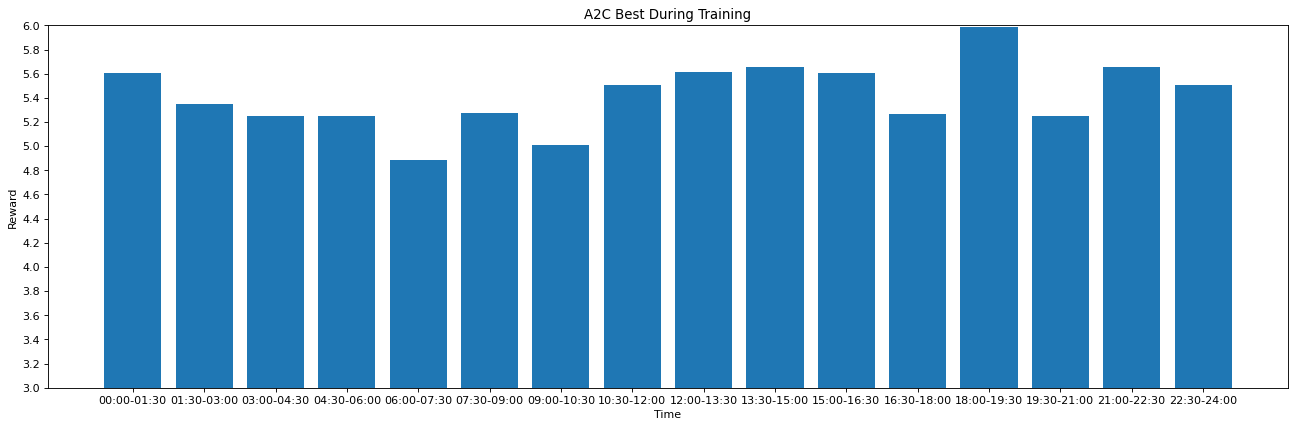

In [138]:
final_result(times, a2c_best, "A2C Best During Training", 3, 6)